In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import import_ipynb
from Lib_Evaluation_Classification_Model import *

importing Jupyter notebook from Lib_Evaluation_Classification_Model.ipynb


### Load data

In [2]:
data = pd.read_csv("data_Foody_pre.csv")

In [3]:
data = data[['restaurant', 'review_score', 'review_text_t1']]
data.head()

,restaurant,review_score,review_text_t1
0,Good Morning Restaurant,8.2,hải_sản ghé rẻ đẹp
1,Hạt Dẻ Trùng Khánh,8.0,đông đối_diện thích hạt_dẻ hẳn chuyên_nghiệp l...
2,Bột - Healthy & Weight Loss Food - Shop Online,8.2,khuyến_mãi đọc thử đồ_ăn đa_số hơi khô thử
3,Bánh Giò Chợ Nguyễn Công Trứ,8.2,nguyễn_công_trứ thẳng đông lộn ngải_cứu kèm tu...
4,Quán Quảng - Bún Quảng,9.0,ngãi thơm kế sò ốc mềm không_thích dầu_mỡ chả_...


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38676 entries, 0 to 38675
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   restaurant      38676 non-null  object 
 1   review_score    38676 non-null  float64
 2   review_text_t1  38676 non-null  object 
dtypes: float64(1), object(2)
memory usage: 906.6+ KB


### Data Preparation

In [5]:
# Process target data
data['target'] = 0 # negative
data['target'][data['review_score']>7] = 2 # positive
data['target'][(data['review_score']>=5)&(data['review_score']<=7)] = 1 # neutral

<ipython-input-5-ecc1e9b5a272>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['target'][data['review_score']>7] = 2 # positive
<ipython-input-5-ecc1e9b5a272>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['target'][(data['review_score']>=5)&(data['review_score']<=7)] = 1 # neutral


In [6]:
data.head()

,restaurant,review_score,review_text_t1,target
0,Good Morning Restaurant,8.2,hải_sản ghé rẻ đẹp,2
1,Hạt Dẻ Trùng Khánh,8.0,đông đối_diện thích hạt_dẻ hẳn chuyên_nghiệp l...,2
2,Bột - Healthy & Weight Loss Food - Shop Online,8.2,khuyến_mãi đọc thử đồ_ăn đa_số hơi khô thử,2
3,Bánh Giò Chợ Nguyễn Công Trứ,8.2,nguyễn_công_trứ thẳng đông lộn ngải_cứu kèm tu...,2
4,Quán Quảng - Bún Quảng,9.0,ngãi thơm kế sò ốc mềm không_thích dầu_mỡ chả_...,2


In [7]:
data.groupby('target').review_text_t1.count()

target
0     5742
1     4465
2    28469
Name: review_text_t1, dtype: int64

In [8]:
# Resampling using resample
from sklearn.utils import resample

In [9]:
df_0 = data[data['target'] == 0]
df_1 = data[data['target'] == 1]
df_2 = data[data['target'] == 2]

In [10]:
f_0_resample = resample(df_0, replace=True, n_samples=17600, random_state=0)
f_2_resample = resample(df_2, replace=False, n_samples=16600, random_state=0)
data = pd.concat([f_0_resample, f_2_resample,df_1])

In [11]:
# data.shape

In [12]:
# Process text data
source = data['review_text_t1']
type(source)

pandas.core.series.Series

In [13]:
text_data = np.array(source)
text_data

array(['phục_vụ kém chờ đắt bàn đồ_ăn bàn quan_sát',
       'nhấn chửi đông đứng đợi nhấn nhấn quăg điện_thoại chỏng_chơ chả khổ_sở lắm tích không_tích chửi điện_thoại cười đợi đông kịp trả_lời hèn không_thì bụg lập giả điên',
       'đừng mỳ thơm sốt tí lỡ hẳn đen không_giờ dẹp', ...,
       'kêu đắng hơi lạ ngâm thích quất tỏi quắt kèm trụng sôi mỳ phục_vụ lắm hix kêu lá_sách trừ chậm phục_vụ đông',
       'xào gỏi đồ_ăn xào hơi nhạt hơi hôi nhẹ gỏi hơi cứng mềm xíu hơi',
       'bạch công_việc ghé vô uống chờ rước lý_tưởng mát_mẻ tệ không_chuyên_nghiệp phục_vụ đợi uống kêu toán uống bình_thường tạm mắc hơi'],
      dtype=object)

In [14]:
count = CountVectorizer(max_features=3500) 
count.fit(text_data)
bag_of_words = count.transform(text_data)
bag_of_words

<38665x3500 sparse matrix of type '<class 'numpy.int64'>'
	with 372665 stored elements in Compressed Sparse Row format>

In [15]:
X = bag_of_words.toarray()
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [16]:
X.shape

(38665, 3500)

In [17]:
y = np.array(data['target'])

In [18]:
y.shape

(38665,)

In [19]:
# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

### Train model

In [20]:
import time
t0 =  time.time()
model = LogisticRegression()
model.fit(X_train, y_train)
t1 = time.time()
time = t1- t0
print("Fit time:", time)
print(model.intercept_)
print(model.coef_)

Fit time: 27.409210681915283
[ 0.84649775 -1.25584208  0.40934433]
[[ 0.06863769  0.99720816  0.97808977 ... -0.09497776  0.2068198
   0.36504271]
 [-0.18096519 -0.56444905 -0.85631321 ... -0.34722674 -0.09531523
  -0.13505459]
 [ 0.1123275  -0.43275911 -0.12177656 ...  0.4422045  -0.11150457
  -0.22998812]]


C:\Users\quynh\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Evaluate model

In [21]:
# Evaluate model based on trainning_test and test_set 
print('Train score: ', model.score(X_train, y_train))
print('Test score: ', model.score(X_test, y_test))

Train score:  0.8719449114185956
Test score:  0.8247769300400879


In [22]:
score, recall, precision, f1 = Static_score_model_class(y_train, model.predict(X_train),'micro')
print('Score:', score)
print('Recall:', recall)
print('Precision:', precision)
print('f1:', f1)

Score: 0.8719449114185956
Recall: 0.8719449114185956
Precision: 0.8719449114185956
f1: 0.8719449114185956


In [23]:
score, recall, precision, f1 = Static_score_model_class(y_test, model.predict(X_test),'micro')
print('Score:', score)
print('Recall:', recall)
print('Precision:', precision)
print('f1:', f1)

Score: 0.8247769300400879
Recall: 0.8247769300400879
Precision: 0.8247769300400879
f1: 0.8247769300400879


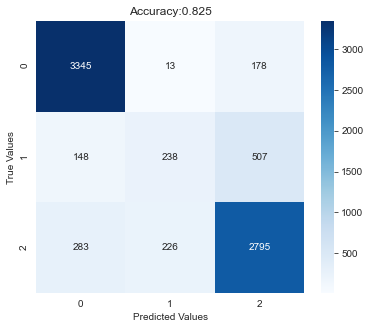

In [24]:
Visualize_confusion_matrix(y_test, model.predict(X_test))

#### Nhận xét:
* Thuật toán Logistic Regression cho ra model có độ chính xác xấp xỉ 82.5% và thời gian fit vào khoảng 27.41s
* Mặc dù model có score cao hơn so với model của thuật toán Naive Bayes nhưng xét về thời gian fit và f1-score thì Naive Bayes có phần nhỉnh hơn

### Tunning parameter

In [25]:
Lr_param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    'max_iter':[100,200],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
}

In [26]:
from sklearn.model_selection import GridSearchCV
LRmodel_tune = GridSearchCV(LogisticRegression(), Lr_param_grid, cv=5)

In [ ]:
LRmodel_tune.fit(X_train, y_train)

In [ ]:
print(LRmodel_tune.best_score_)
print(LRmodel_tune.best_params_)